# Detecção rápida de objetos usando uma cascata reforçada de simples Características

# Por  Paul Viola e Michael Jones

Viola-Jones como são conhecidos, criaram um artigo que se chama 'Rapid Object Detection using a Boosted Cascade of Simple Features', citado cerca de 17.000 vezes e apresentado em um Pentium 3 de 700MHz e rodou a 15 quadros/s, o que era totalmente inédito pra época[[2](#referencias)]. Incrivelmente rápido, e se usado com qualquer tipo de detecção de rosto, vai usar algo muito parecido com o que eles fizeram. As técnicas mais citadas são, detecção de formas ométricas, modelos estatísticos, redes neurais, tons de pele e Viola-Jones[[4](#referencias)]. 
     
E apesar do fato de que o 'deep learning' meio que assumiu tudo isso, esse tipo de detecção ainda funciona perfeitamente, as pessoas o usam mais, mas usam com recursos artesanais, pequenas redes neurais e outros tipos de classificadores[2].  A diferença com o 'deep learning' é que este pega bordas e outros recursos e os combina em objetos em um tipo de hierarquia e aí talvez são encontrados rostos. E o que isso faz é tomar decisões muito rápidas.
     
Esse tipo de detecção tem alguns problemas, um deles é que não se sabe o tamanho do rosto e talvez possua uma imagem com alta resolução. É necessário fazer o processo de detecção muitas vezes por segundo e há ainda que considerar o fato de que há pessoas com etnias diferentes, variação de iluminação, expressões facias, óculos, pessoas jovens, pessoas velhas  e entre outros.

Viola-Jones criaram um classificador que usa recursos muito simples, um pedaço de imagem subtraído de outro pedaço de imagem. Por si só isso não é tão bom, mas se você tiver vários e vários deles e todos eles dando uma pista de que talvez isso seja um rosto, você talvez possa começar a tomar uma decisão adequada.

Viola-Jones propuseram  usar recursos retangulares muito simples que são apenas uma parte de uma imagem subtraída de outra parte dessa mesma imagem, que se dá pela soma dos pixels dentro dos retângulos brancos e subtraídos da soma dos pixels do retângulo cinza[[2](#referencias)]. Portanto, existem alguns tipos desses recursos, um deles são dois recursos retangulares, onde subtraímos um lado do outro lado. Dois retângulos próximos um do outro (A e B - figura abaixo), que são uma determinada quantidade de pixels, onde são subtraídos um do outro, basicamente estão procurando por pedaços de uma imagem onde um bit é mais escuro ou claro do que outro. Pois se você olhar pra uma imagem de um rosto em escala de cinza, é possível perceber que a região dos olhos é mais escura que a testa por exemplo.
    
Há outro recurso que se usa três retângulos, onde se subtrai o meio das laterais (C - figura abaixo) e o o recurso onde se tem 4 retângulos (D - figura abaixo) que é pra encontrar "coisas" do canto diagonal[[5](#referencias)]. 


![retangulo](retang.jpg "Imagem do artigo de Viola-Jones")

O algoritmo que eles utilizam se baseiam nas características de Haar. O OpenCV refere-se a esse detector como 'Classificador Haar', pois usa recursos de Haar ou wavelets semelhantes a Haar, que consistem em adicionar e subtrair regiões de imagens retangulares antes de limitar o resultado[[3](#referencias)]. Dessa forma, pode-se definir como I e P sendo uma imagem e um padrão, ambos com mesmo tamanho N x N. A característica associada ao padrão P da imagem I é definida pela equação abaixo[[6](#referencias)]:

\begin{equation*}
\left (\sum_{1≤i≤N} \sum_{1≤j≤N} I(i, j)1p_{i, j}  branco - \sum_{1≤i≤N} \sum_{1≤j≤N} I(i, j)1p_{i, j}  preto \right)
\end{equation*}


As amostras da imagem são do tipo (xn, yn) com N amostras, onde xn é uma imagem de dimensão 24×24 e yn = {0, 1} é o rótulo de classe. Neste caso yn = 1 corresponde a uma imagem de face e yn = 0 a uma imagem de não-face. A dimensão das amostras faz com que o número total de aracterísticas seja maior que 180000, sendo necessário uma seleção melhor das características. 

É utilizada uma versão do AdaBoost conhecida como Gentle Adaboost. Em cada iteração um conjunto de classificadores fracos (hj) é ajustado para minimizar o erro de classificação. Cada um destes classificadores corresponde a uma característica fj(xn), onde j = 1, · · · , J e J é o total de características.
Dado um limiar θj e uma paridade pj , a regra de classificação pode ser vitsa na equação abaixo, onde a paridade vai indicar a direção da desigualdade.  [[1](#referencias)]


hj(xn) =  1, se pjfj(xn) > pjθj ou 0, caso contrário,


Essas abordagens são baseadas em aprendizado de máquina (machine learning). A contribuição deles foi uma maneira muito rápida de calcular esses recursos e usá-los pra fazer uma classificação de rosto[[2](#referencias)]. 
    
Um problema que há, é o fato de que calcular grandes grupos de pixels e somá-los é um processo bastante lento em se tratando de uma imagem com alta resolução. Então eles tiveram uma ideia e chamaram-na de 'imagem integral' que faz com que esse caminho seja mais rápido. A representação de dados pode ser definida pela equação abaixo da matriz (imagem integral)[[1](#referencias)]: 

\begin{equation*}
\left (I(m,n) = \sum_{m≥n, n≥n′} g(m', n') \right)
\end{equation*}

A imagem integral vai ser uma matriz que possui o mesmo tamanho da imagem original, e cada elemento da nova matriz possuirá a soma de todos os níveis de cinza dos pixels à esquerda, acima e do pixel atual[[4](#referencias)], ou seja, é pré computado parte da aritmética feita pelos retângulos e armazenadas em uma forma intermediária, podendo asim calcular 'retângulos menos retângulos' mais facilmente, representado na figura  abaixo.


![integral1](integ1.jpg )
![integral2](integ2.jpg )
![integral](integ.jpg )

Então a ideia é pegar da imagem integral a soma do retângulo que vai de 1 à 14 de cima pra baixo e 1 à 12 da esquerda pra direita que vai dar 64, a soma do retângulo que vai de 1 à 23 e 1 à 9, subtrair do último pixel que é 113 e adicionar o bit 40 (que é a soma de todo o retângulo) pois foi retirado duas vezes conforme figura abaixo. 

![integral](integt.jpg)

Se essa era uma imagem grande (alta resolução), agora ela tem 18 bits que por sinal é a soma do último quadrado de 4 bits da imagem orginal (1+5+6+6),  economizando assim um bom tempo em cálculos. Se presume que a imagem não é vista apenas uma vez pra fazer isso, pois há muitos lugares que um rosto pode estar, é preciso olhar pra muitas combinações de pixel e regiões diferentes. Então o que se faz é calcular essa imagem integral uma vez e, em seguida, usá-la como base pra fazer isso mais rapidamente.
    
O que eles fazem basicamente é calcular todas as carcterísticas, por exemplo, de uma imagem 24x24 pixels, eles calculam todas as combinações possíveis de 2, 3 e 4 recursos retângulares e descobrem pra qual determinado conjunto de dados são faces ou não. 
    
Por exemplo, normalmente as bochechas são mais brilhantes ou mais escuras que os olhos, olhando por essa perspectiva, o primeiro classificador vai começar apenas com esse recurso. O retângulo A da primeira figura passará pela imagem e se houver algo na imagem que possui essa identificação é vista como 'imagem positiva', e se houver falha é vista como 'imagem negativa'.
    
Então se nesse estágio der positivo, ela passa para o próximo estágio. O segundo retângulo que é o C da primeira figura também passará pela imagem, e também se esse der positivo passará para o próximo estágio. Cada vez que se é calculado um desses recursos leva-se um pouco de tempo e quanto mais rápido encontrar a falha, melhor. Pra grande parte da imagem não há computação, pois, se é passado apenas um recurso na mesma e essa falha, logo não haverá um rosto ali. O funcionamento do algoritmo em cascata pode ser visto na imagem abaixo (figura retirada de [[4](#referencias)])

![casc](cascata.jpg )

Resumidamente Viola-Jones representa a imagem em um espaço de características baseadas nos filtros Haar, monta um classifcador baseado em 'boosting' pra selecionar as características mais relevantes e por último se faz uma combinação em cascata desses classificadores[[1](#referencias)].

# Bibliotecas

In [3]:
import cv2
import imutils
import argparse
import skimage
from skimage import io, exposure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import matplotlib.pyplot as imshowpair

#https://github.com/opencv/opencv/tree/master/data/haarcascades

# DETECÇÃO DE OLHOS

In [4]:
#xml que fazem a classificação de reconhecimento
classificacao = "haarcascade_eye_tree_eyeglasses.xml"
eyecascade =  cv2.CascadeClassifier(classificacao)

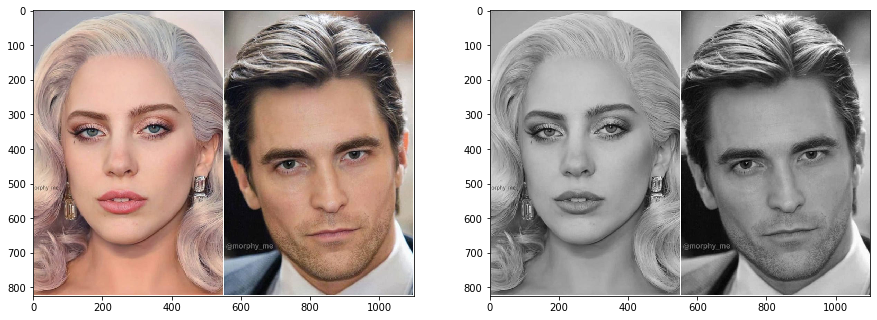

In [5]:
#leitura da imagem
imagem = io.imread('gaga.jpg')
imagegray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 12))
ax1.imshow(imagem)
ax2.imshow(imagegray, cmap = plt.cm.gray)
plt.show()


In [6]:
#detecção de imagem
eyes = eyecascade.detectMultiScale(imagem, scaleFactor = 1.1, minNeighbors = 7, minSize = (15, 15))
#scaleFactor –  Parameter specifying how much the image size is reduced at each image scale.
#minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.

In [7]:
for (x, y, w, h) in eyes:
    imageeye = cv2.rectangle(imagegray, (x, y), (x+w, y+h), (0, 255, 100), 2)

# Exibir a imagem
cv2.imshow("Detecção de olhos", imageeye)
cv2.waitKey(0)
cv2.imwrite('imageeye2.jpg', imageeye)
cv2.destroyAllWindows()

![imagem](imageeye2.jpg "Imagem com identificação dos olhos")

# DETECÇÃO DE ROSTOS

In [12]:
#xml que faz a classificação de reconhecimento
classificacao = "haarcascade_frontalface_default.xml"
rostocascade =  cv2.CascadeClassifier(classificacao)

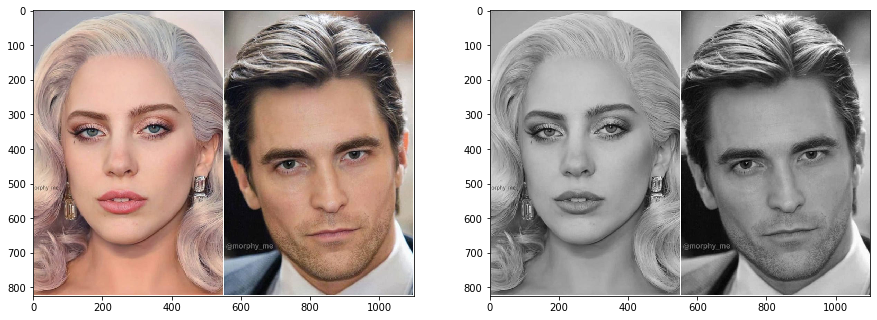

In [7]:
#leitura da imagem
imagem = io.imread('gaga.jpg')
imagegray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 12))
ax1.imshow(imagem)
ax2.imshow(imagegray, cmap = plt.cm.gray)
plt.show()

In [8]:
faces = rostocascade.detectMultiScale(imagegray, scaleFactor = 1.2, minNeighbors = 5, minSize = (30, 30))

In [9]:
for (i, (x, y, w, h)) in enumerate(faces):
    imageface = cv2.rectangle(imagegray, (x, y), (x+w, y+h), (0, 255, 100), 2)
    cv2.putText(imagegray, "{}".format(i + 1), (100+x, y-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

# Exibir a imagem
cv2.imshow("Detecção de rostos", imageface)
#cv2.waitKey(0)
cv2.imwrite('face.jpg', imageface)
cv2.destroyAllWindows()

![rosto](face.jpg "Imagem com identificação do rosto")

# DETECÇÃO DE CORPO INTEIRO

In [10]:
#xml que faz a classificação de reconhecimento
classificacao = "haarcascade_fullbody.xml"
bodycascade =  cv2.CascadeClassifier(classificacao)

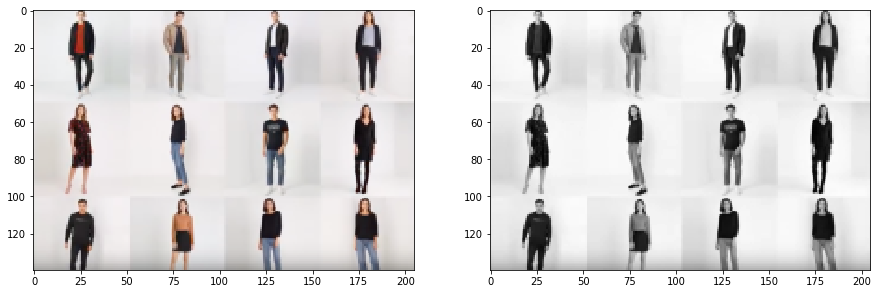

In [11]:
#leitura da imagem
imagemb = io.imread('person.jpg')
imagemb = imutils.resize(imagemb, width = min(205, imagemb.shape[1]))
imagegrayb = cv2.cvtColor(imagemb, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 12))
ax1.imshow(imagemb)
ax2.imshow(imagegrayb, cmap = plt.cm.gray)
plt.show()

In [12]:
body = bodycascade.detectMultiScale(imagegrayb, scaleFactor =1.003, minNeighbors = 3)
print(len(body))

12


In [13]:
for (x, y, w, h) in body:
    imagebody = cv2.rectangle(imagegrayb, (x, y), (x+w, y+h), (0, 255, 100), 2)

# Exibir a imagem
cv2.imshow("Detecção de corpo", imagebody)
#cv2.waitKey(0)
cv2.imwrite('imagebod.jpg', imagebody)
cv2.destroyAllWindows()

![imagebod](imagebod.jpg "Imagem com identificação do rosto")

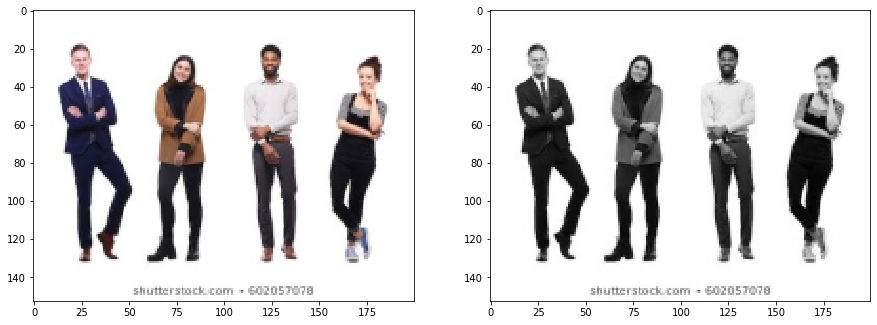

In [14]:
#leitura da imagem
imagemb = io.imread('fullbody.jpg')
imagemb = imutils.resize(imagemb, width = min(200, imagemb.shape[1]))
imagegrayb = cv2.cvtColor(imagemb, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 12))
ax1.imshow(imagemb)
ax2.imshow(imagegrayb, cmap = plt.cm.gray)
plt.show()

In [15]:
body = bodycascade.detectMultiScale(imagegrayb, scaleFactor =1.009, minNeighbors = 2)
print(len(body))

4


In [16]:
for (i, (x, y, w, h)) in enumerate(body):
    imagebody = cv2.rectangle(imagegrayb, (x, y), (x+w, y+h), (0, 255, 100), 2)
    cv2.putText(imagegrayb, "{}".format(i + 1), (x, y+3),
        cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

# Exibir a imagem
cv2.imshow("Detecção de corpo", imagebody)
#cv2.waitKey(0)
cv2.imwrite('corpo.jpg', imagebody)
cv2.destroyAllWindows()

![imagebody](corpo.jpg "Imagem com identificação do rosto")

# DETECÇÃO DE GATOS

In [18]:
#xml que faz a classificação de reconhecimento
classificacao = cv2.data.haarcascades + "haarcascade_frontalcatface.xml"
catcascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalcatface.xml")

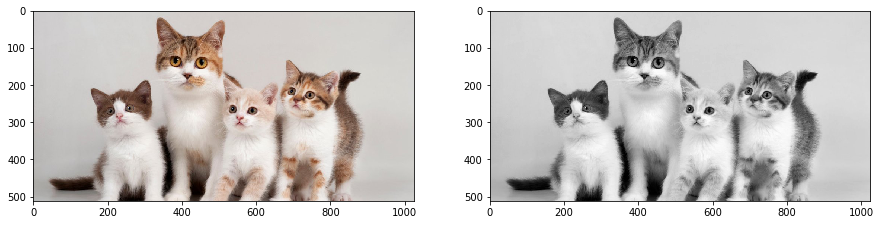

In [18]:
#leitura da imagem
imagemc = io.imread('cats.jpg')
#imagemc = imutils.resize(imagemc, width = min(500, imagemb.shape[1]))
imagegrayc = cv2.cvtColor(imagemc, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 12))
ax1.imshow(imagemc)
ax2.imshow(imagegrayc, cmap = plt.cm.gray)
plt.show()

In [19]:
cats = catcascade.detectMultiScale(imagegrayc, scaleFactor = 1.01, minNeighbors = 10)
print(len(cats))

4


In [20]:
for (i, (x, y, w, h)) in enumerate(cats):
    imagecat = cv2.rectangle(imagegrayc, (x, y), (x+w, y+h), (0, 255, 100), 2)
    cv2.putText(imagegrayc, "{}".format(i + 1), (x, y-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

# Exibir a imagem
cv2.imshow("Detecção de gatos", imagecat)
cv2.waitKey(0)
cv2.imwrite('gatos1.jpg', imagecat)
cv2.destroyAllWindows()

![cats](gatos1.jpg "Imagem com identificação do rosto")

# DETECÇÃO DE GATOS - TESTE COM OUTRA IMAGEM

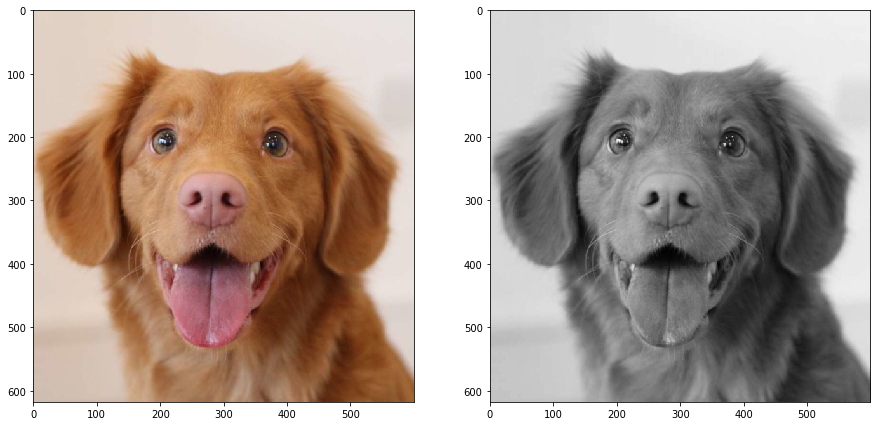

In [25]:
#leitura da imagem
imagemc = io.imread('dog.jpg')
imagemc = imutils.resize(imagemc, width = min(600, imagemc.shape[1]))
imagegrayc = cv2.cvtColor(imagemc, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15, 12))
ax1.imshow(imagemc)
ax2.imshow(imagegrayc, cmap = plt.cm.gray)
plt.show()

In [26]:
cats = catcascade.detectMultiScale(imagegrayc, scaleFactor = 1.001, minNeighbors = 2)
print(len(cats))

13


In [ ]:
for (i, (x, y, w, h)) in enumerate(cats):
    imagecat = cv2.rectangle(imagegrayc, (x, y), (x+w, y+h), (0, 255, 100), 2)
    cv2.putText(imagegrayc, "{}".format(i + 1), (x, y-10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

# Exibir a imagem
cv2.imshow("Detecção de gatos", imagecat)
cv2.waitKey(0)
cv2.imwrite('gatoss2.jpg', imagecat)
cv2.destroyAllWindows()

![cats](gatoss2.jpg "Imagem com identificação do rosto")

# [Referências](#referencias)

[1] ARAÚJO, Gabriel. Algoritmos para reconhecimento de caracteríticas faciais baseado em filtros de correlação. Rio de Janeiro: UFRJ/COPPE, p. 18 - 19, Fev. 2010.

[2] HARAN, Brady. Detecting Faces (Viola Jones Algorithm) - Computerphile. 2019. (12m54s). Disponível em: <https://www.youtube.com/watch?v=uEJ71VlUmMQ>. Acesso em: 29 set. 2020.

[3] PAIXAO, E P. Aplicação do Algoritmo Viola-Jones na Detecção de Objeto. 2018. Trabalhode Conclusão de Curso. Curso de Engenharia Elétrica, Universidade Regional do Noroeste do Estado do Rio Grande do Sul - UNIJUÍ, Ijuí, 2018.

[4] SANTANAS, L., GOMES, F., SANTOS, T. Processo de detecção facial uilizando viola;Jones. Em: Interfaces Científicas - Exatas e Tecnológicas, Aracaju, V.1, N.1, p. 35 - 40, Fev. 2015.

[5] VIOLA, P., JONES, M. “Rapid object detection using a boosted cascade of simple features”. In: Computer Vision and Pattern Recognition, 2001. CVPR 2001. Proceedings of the 2001 IEEE Computer Society Conference on, v. 1, pp. I–511–I–518 vol.1, 2001.

[6] WANG, Yi-Qing. An Analysis of the Viola-Jones Face Detection Algorithm, Image Processing On Line, 4 (2014), pp. 128–148. https://doi.org/10.5201/ipol.2014.104

